In [1]:
# =============================================================================
# NOTEBOOK 2: SQL INTEGRATION AND ANALYSIS
# =============================================================================

## 1. Setup - Import Libraries and Mount Google Drive
# -----------------------------------------------------------------------------
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Mount your Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

print("Libraries imported and Google Drive mounted successfully.")

Mounted at /content/drive
Libraries imported and Google Drive mounted successfully.


In [2]:
## 2. Load Data and Create Database
# -----------------------------------------------------------------------------
# Define file paths
cleaned_csv_path = '/content/drive/MyDrive/Advanced HR Analytics Project/cleaned_hr_data.csv'
db_path = '/content/drive/MyDrive/Advanced HR Analytics Project/hr_analytics.db'

# Load the cleaned dataset
try:
    df = pd.read_csv(cleaned_csv_path)
    # Create a connection to the SQLite database.
    # This will create the database file if it doesn't exist.
    conn = sqlite3.connect(db_path)

    # Load the DataFrame into a SQL table named 'employees'.
    # if_exists='replace' will drop the table first if it exists.
    df.to_sql('employees', conn, if_exists='replace', index=False)

    print(f"Database created at '{db_path}' and 'employees' table loaded with {len(df)} records.")

except FileNotFoundError:
    print(f"Error: The file was not found at {cleaned_csv_path}")
    print("Please ensure Notebook 1 was run successfully and the file was saved.")
    conn = None # Set conn to None to prevent further errors

Database created at '/content/drive/MyDrive/Advanced HR Analytics Project/hr_analytics.db' and 'employees' table loaded with 1470 records.


In [3]:
## 3. Define a Reusable Query Function
# -----------------------------------------------------------------------------
# This helper function makes it easy to run queries and get results as a DataFrame.
def run_query(query):
    if conn:
        return pd.read_sql_query(query, conn)
    else:
        print("Database connection is not available.")
        return pd.DataFrame()

# Let's test it with a simple query
if conn:
    test_query = "SELECT DISTINCT department FROM employees;"
    print("Testing the query function with distinct departments:")
    display(run_query(test_query))

Testing the query function with distinct departments:


,department
0,Sales
1,Research & Development
2,Human Resources


In [4]:
print("--- 1. Data Preview (First 10 Rows) ---")
query_preview = """
SELECT
    *
FROM
    employees
LIMIT 10;
"""
display(run_query(query_preview))

--- 1. Data Preview (First 10 Rows) ---


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,tenure_bucket,salary_band,composite_satisfaction,attrition_flag
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,0,1,6,4,0,5,6-10 years,High,2.33,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,3,3,10,7,1,7,11-15 years,High,3.00,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,3,0,0,0,0,0-2 years,Low,3.00,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,8,7,3,0,6-10 years,Low,3.33,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,3,2,2,2,2,3-5 years,Medium,2.33,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,2,2,7,7,3,6,6-10 years,Medium,3.67,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,10,3,...,3,2,1,0,0,0,0-2 years,Low,1.67,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,11,4,...,2,3,1,0,0,0,0-2 years,Low,3.00,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,12,4,...,2,3,9,7,1,8,6-10 years,Very High,3.00,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,13,3,...,3,2,7,7,7,7,6-10 years,High,2.67,0


In [5]:
print("\n--- 2. Descriptive Statistics for Key Numerical Columns ---")
query_describe = """
SELECT
    COUNT(*) AS total_employees,
    MIN(age) AS min_age,
    MAX(age) AS max_age,
    ROUND(AVG(age), 1) AS average_age,
    ROUND(AVG(monthlyincome), 0) AS average_monthly_income,
    ROUND(AVG(yearsatcompany), 1) AS average_tenure_years
FROM
    employees;
"""
display(run_query(query_describe))


--- 2. Descriptive Statistics for Key Numerical Columns ---


,total_employees,min_age,max_age,average_age,average_monthly_income,average_tenure_years
0,1470,18,60,36.9,6503.0,7.0


In [6]:
print("\n--- 3. List of Unique Departments ---")
query_unique_depts = """
SELECT DISTINCT
    department
FROM
    employees
ORDER BY
    department;
"""
display(run_query(query_unique_depts))


--- 3. List of Unique Departments ---


,department
0,Human Resources
1,Research & Development
2,Sales


In [8]:
print("\n--- 4. Headcount by Job Role (Top 10) ---")
query_job_counts = """
SELECT
    jobrole,
    COUNT(*) AS number_of_employees
FROM
    employees
GROUP BY
    jobrole
ORDER BY
    number_of_employees DESC
LIMIT 10;
"""
display(run_query(query_job_counts))


--- 4. Headcount by Job Role (Top 10) ---


,jobrole,number_of_employees
0,Sales Executive,326
1,Research Scientist,292
2,Laboratory Technician,259
3,Manufacturing Director,145
4,Healthcare Representative,131
5,Manager,102
6,Sales Representative,83
7,Research Director,80
8,Human Resources,52


In [9]:
## 4. SQL Analysis - Answering HR Business Questions
# -----------------------------------------------------------------------------
# Now we'll run the SQL queries to analyze attrition and demographics.
if conn:
    # --- 4.1. What is the overall attrition rate? ---
    print("\n--- Overall Attrition Rate ---")
    query_overall_attrition = """
    SELECT
        (SUM(attrition_flag) * 100.0 / COUNT(*)) AS overall_attrition_rate
    FROM
        employees;
    """
    display(run_query(query_overall_attrition))


--- Overall Attrition Rate ---


,overall_attrition_rate
0,16.122449


In [10]:

    # --- 4.2. What is the attrition rate by department? ---
    print("\n--- Attrition Rate by Department ---")
    query_dept_attrition = """
    SELECT
        department,
        COUNT(*) AS total_employees,
        SUM(attrition_flag) AS attrition_count,
        ROUND(SUM(attrition_flag) * 100.0 / COUNT(*), 2) AS attrition_rate
    FROM
        employees
    GROUP BY
        department
    ORDER BY
        attrition_rate DESC;
    """
    attrition_by_dept = run_query(query_dept_attrition)
    display(attrition_by_dept)


--- Attrition Rate by Department ---


,department,total_employees,attrition_count,attrition_rate
0,Sales,446,92,20.63
1,Human Resources,63,12,19.05
2,Research & Development,961,133,13.84


In [11]:
 # --- 4.3. What is the attrition rate by job role? ---
if conn:
    print("\n--- Attrition Rate by Job Role (Top 5) ---")
    query_role_attrition = """
    SELECT
        jobrole,
        COUNT(*) AS total_employees,
        SUM(attrition_flag) AS attrition_count,
        ROUND(SUM(attrition_flag) * 100.0 / COUNT(*), 2) AS attrition_rate
    FROM
        employees
    GROUP BY
        jobrole
    ORDER BY
        attrition_rate DESC
    LIMIT 5;
    """
    attrition_by_role = run_query(query_role_attrition)
    display(attrition_by_role)



--- Attrition Rate by Job Role (Top 5) ---


,jobrole,total_employees,attrition_count,attrition_rate
0,Sales Representative,83,33,39.76
1,Laboratory Technician,259,62,23.94
2,Human Resources,52,12,23.08
3,Sales Executive,326,57,17.48
4,Research Scientist,292,47,16.10


In [12]:
# --- Attrition Rate by Salary Band ---
print("\n--- Attrition Rate by Salary Band ---")
query_salary_attrition = """
SELECT
    salary_band,
    COUNT(*) AS total_employees,
    SUM(attrition_flag) AS attrition_count,
    ROUND(SUM(attrition_flag) * 100.0 / COUNT(*), 2) AS attrition_rate
FROM
    employees
GROUP BY
    salary_band
ORDER BY
    attrition_rate DESC;
"""
attrition_by_salary = run_query(query_salary_attrition)
display(attrition_by_salary)


--- Attrition Rate by Salary Band ---


,salary_band,total_employees,attrition_count,attrition_rate
0,Low,369,108,29.27
1,Medium,366,52,14.21
2,High,367,39,10.63
3,Very High,368,38,10.33


In [13]:
    # 4.4. What is the average monthly income by job role and attrition status? ---
    print("\n--- Average Monthly Income by Job Role and Attrition ---")
    query_income_analysis = """
    SELECT
        jobrole,
        attrition,
        ROUND(AVG(monthlyincome), 0) AS average_monthly_income
    FROM
        employees
    GROUP BY
        jobrole,
        attrition
    ORDER BY
        jobrole,
        attrition;
    """
    display(run_query(query_income_analysis).head(10)) # Display first 10 rows for brevity


--- Average Monthly Income by Job Role and Attrition ---


,jobrole,attrition,average_monthly_income
0,Healthcare Representative,No,7454.0
1,Healthcare Representative,Yes,8548.0
2,Human Resources,No,4392.0
3,Human Resources,Yes,3716.0
4,Laboratory Technician,No,3337.0
5,Laboratory Technician,Yes,2919.0
6,Manager,No,17201.0
7,Manager,Yes,16797.0
8,Manufacturing Director,No,7290.0
9,Manufacturing Director,Yes,7366.0


In [14]:
# --- Average Monthly Income by Job Role and Tenure ---
print("\n--- Average Monthly Income by Job Role and Tenure ---")
query_compensation_tenure = """
SELECT
    jobrole,
    tenure_bucket,
    ROUND(AVG(monthlyincome), 0) AS average_monthly_income,
    ROUND(AVG(yearssincelastpromotion), 1) as avg_years_since_promotion
FROM
    employees
GROUP BY
    jobrole,
    tenure_bucket
ORDER BY
    jobrole,
    tenure_bucket;
"""
compensation_by_tenure = run_query(query_compensation_tenure)
display(compensation_by_tenure)


--- Average Monthly Income by Job Role and Tenure ---


,jobrole,tenure_bucket,average_monthly_income,avg_years_since_promotion
0,Healthcare Representative,None,10312.0,15.0
1,Healthcare Representative,0-2 years,7175.0,0.1
2,Healthcare Representative,11-15 years,7048.0,4.0
3,Healthcare Representative,15+ years,10539.0,8.6
4,Healthcare Representative,3-5 years,6488.0,0.9
5,Healthcare Representative,6-10 years,7198.0,2.0
6,Human Resources,0-2 years,2548.0,0.0
7,Human Resources,11-15 years,5017.0,1.7
8,Human Resources,15+ years,10482.0,3.0
9,Human Resources,3-5 years,3827.0,0.9


In [15]:
# Advanced Analysis: Workforce Demographics
if conn:
    # --- 5.1. Age Distribution Analysis using CASE statement ---
    print("\n--- Employee Age Distribution and atrrition rate ---")
    query_age_distribution = """
    SELECT
        CASE
            WHEN age BETWEEN 18 AND 25 THEN '18-25'
            WHEN age BETWEEN 26 AND 35 THEN '26-35'
            WHEN age BETWEEN 36 AND 45 THEN '36-45'
            WHEN age BETWEEN 46 AND 55 THEN '46-55'
            ELSE '55+'
        END as age_group,
        COUNT(*) AS employee_count,
        ROUND(SUM(attrition_flag) * 100.0 / COUNT(*), 2) AS attrition_rate_in_group
    FROM
        employees
    GROUP BY
        age_group
    ORDER BY
        age_group;
    """
    age_dist = run_query(query_age_distribution)
    display(age_dist)


--- Employee Age Distribution and atrrition rate ---


,age_group,employee_count,attrition_rate_in_group
0,18-25,123,35.77
1,26-35,606,19.14
2,36-45,468,9.19
3,46-55,226,11.50
4,55+,47,17.02


In [16]:
    # --- 5.2. Gender Diversity ---
    print("\n--- Gender Diversity and Attrition Rate ---")
    query_gender_diversity = """
    SELECT
        gender,
        COUNT(*) as employee_count,
        ROUND(SUM(attrition_flag) * 100.0 / COUNT(*), 2) AS attrition_rate
    FROM
        employees
    GROUP BY
        gender;
    """
    display(run_query(query_gender_diversity))


--- Gender Diversity and Attrition Rate ---


,gender,employee_count,attrition_rate
0,Female,588,14.80
1,Male,882,17.01


In [17]:
# --- Workforce Demographics by Education Field ---
print("\n--- Attrition Rate by Education Field ---")
query_education_breakdown = """
SELECT
    educationfield,
    COUNT(*) AS employee_count,
    ROUND(SUM(attrition_flag) * 100.0 / COUNT(*), 2) AS attrition_rate
FROM
    employees
GROUP BY
    educationfield
ORDER BY
    attrition_rate DESC;
"""
attrition_by_education = run_query(query_education_breakdown)
display(attrition_by_education)


--- Attrition Rate by Education Field ---


,educationfield,employee_count,attrition_rate
0,Human Resources,27,25.93
1,Technical Degree,132,24.24
2,Marketing,159,22.01
3,Life Sciences,606,14.69
4,Medical,464,13.58
5,Other,82,13.41


In [18]:
# --- Cohort Analysis: Employee Retention by Hire Year ---
print("\n--- Cohort Analysis: Employee Retention by Hire Year ---")
# NOTE: We approximate hire_year as the dataset does not contain this field.
query_cohort_analysis = """
WITH cohort_data AS (
    SELECT
        employeenumber,
        (2024 - yearsatcompany) AS hire_year,
        attrition_flag
    FROM
        employees
),
cohort_summary AS (
    -- Count total starters for each cohort (hire_year)
    SELECT
        hire_year,
        COUNT(*) AS total_starters
    FROM
        cohort_data
    GROUP BY
        hire_year
),
leavers_summary AS (
    -- Count total leavers for each cohort
    SELECT
        hire_year,
        SUM(attrition_flag) AS total_leavers
    FROM
        cohort_data
    GROUP BY
        hire_year
)
SELECT
    cs.hire_year,
    cs.total_starters,
    ls.total_leavers,
    ROUND((cs.total_starters - ls.total_leavers) * 100.0 / cs.total_starters, 2) AS retention_rate
FROM
    cohort_summary cs
JOIN
    leavers_summary ls ON cs.hire_year = ls.hire_year
WHERE
    cs.hire_year < 2024  -- Exclude people hired this year for a cleaner analysis
ORDER BY
    cs.hire_year;
"""
retention_by_cohort = run_query(query_cohort_analysis)
display(retention_by_cohort)


--- Cohort Analysis: Employee Retention by Hire Year ---


,hire_year,total_starters,total_leavers,retention_rate
0,1984,1,1,0.00
1,1987,1,0,100.00
2,1988,2,0,100.00
3,1990,1,0,100.00
4,1991,5,1,80.00
5,1992,3,1,66.67
6,1993,3,1,66.67
7,1994,1,0,100.00
8,1995,2,0,100.00
9,1997,2,0,100.00


/tmp/ipython-input-74441241.py:34: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


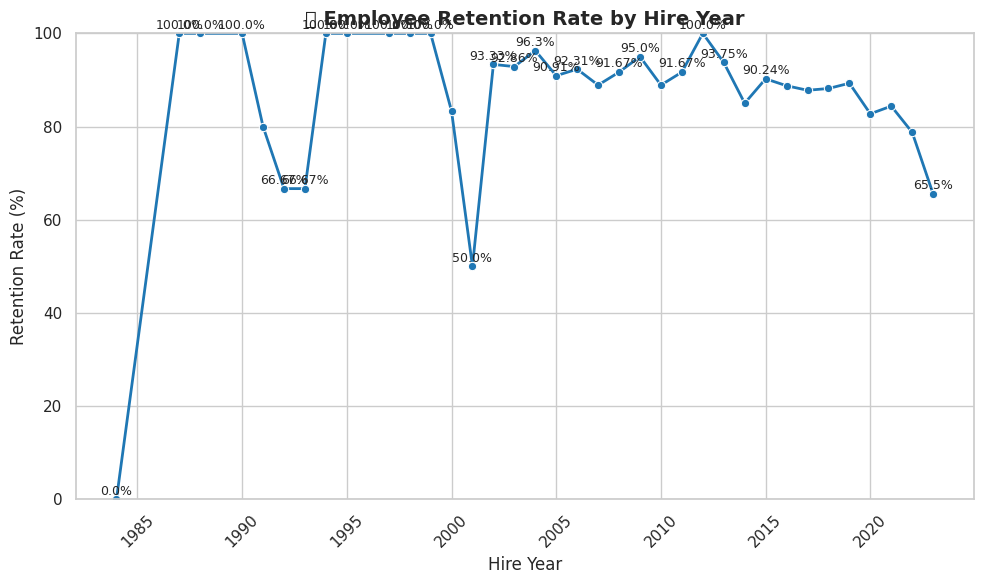

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `retention_by_cohort` is already loaded from your SQL query
# and contains columns: hire_year, total_starters, total_leavers, retention_rate

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Line plot of retention rate over hire years
sns.lineplot(
    data=retention_by_cohort,
    x="hire_year",
    y="retention_rate",
    marker="o",
    linewidth=2,
    color="#1f77b4"
)

# Annotate key dips or spikes (optional)
for i, row in retention_by_cohort.iterrows():
    if row["retention_rate"] < 70 or row["retention_rate"] > 90:
        plt.text(row["hire_year"], row["retention_rate"] + 1,
                 f"{row['retention_rate']}%", ha='center', fontsize=9)

# Titles and labels
plt.title("📈 Employee Retention Rate by Hire Year", fontsize=14, weight='bold')
plt.xlabel("Hire Year")
plt.ylabel("Retention Rate (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


In [20]:
## 6. Close the Connection
# -----------------------------------------------------------------------------
if conn:
    # It's important to close the database connection when you're done.
    conn.close()
    print("\nDatabase connection closed successfully.")


Database connection closed successfully.
